### Data Exploration

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('max_columns',100)

In [2]:
train = pd.read_csv('Dmi_train_20171102.csv')
test = pd.read_csv('Dmi_test_20171102.csv')

In [58]:
one_or_zero = train.isin([0,1]).all(axis = 0)
num_cols = train.columns[~one_or_zero]
list(num_cols)
numeric_train = train[list(num_cols)]
#whoops still need to remove character
numeric_train = numeric_train.select_dtypes(exclude = ['object'])
numeric_train.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,exterior_quality,exterior_condition,bsmt_height,bsmt_condition,bsmt_exposure,bsmt_finished2,BsmtFinishedShare,home_funct,fireplace_quality,gar_type,gar_finish,gar_qual,gar_cond,gar_perception,driveway,fence
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,2,2,3,3,0,1,0.824766,7.0,0.0,2.0,2,3.0,2.0,6.0,3,0.0
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,1,2,3,3,3,1,0.774960,7.0,2.0,2.0,2,3.0,2.0,6.0,3,0.0
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,2,2,3,3,1,1,0.528261,7.0,2.0,2.0,2,3.0,2.0,6.0,3,0.0
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,1,2,2,4,0,1,0.285714,7.0,3.0,1.5,1,3.0,2.0,6.0,3,0.0
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,2,2,3,3,2,1,0.572052,7.0,2.0,2.0,2,3.0,2.0,6.0,3,0.0


In [63]:
cols = ['Unnamed: 0', 'MSSubClass']
numeric_train = numeric_train.drop(cols,axis=1)
numeric_train.head()

ValueError: labels ['Unnamed: 0' 'MSSubClass'] not contained in axis

In [68]:
print('columns in training: ', len(train.columns))
print('columns numeric only: ', len(numeric_train.columns))

columns in training:  181
columns numeric only:  53


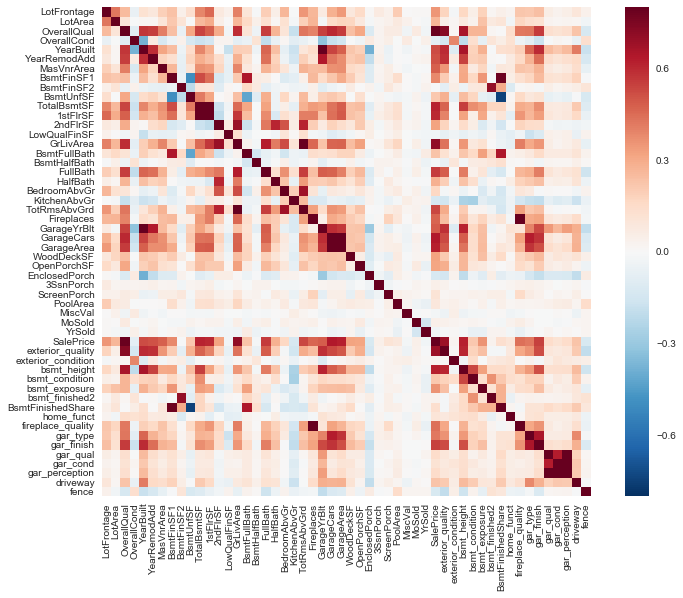

In [70]:
#correlation matrix
corrmat = numeric_train.drop('Id',axis = 1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Ok, who's top 20?

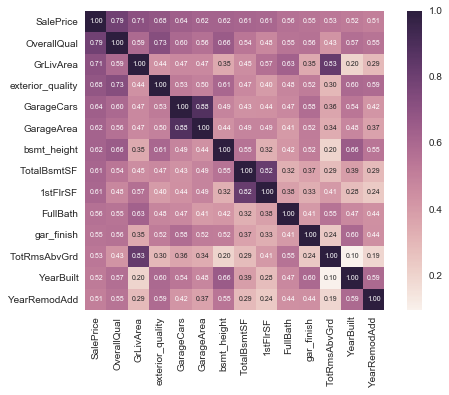

In [89]:
#saleprice correlation matrix
k = 14 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(numeric_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Negative correlations? Not much there according to this plot, I'm kinda curious why there aren't more negative variables.

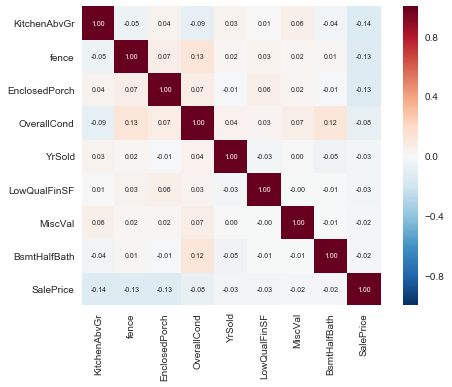

In [101]:
cols = corrmat.nsmallest(k-6, 'SalePrice')['SalePrice'].index
cols = cols.append(pd.Index(['SalePrice']))
cm = np.corrcoef(numeric_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

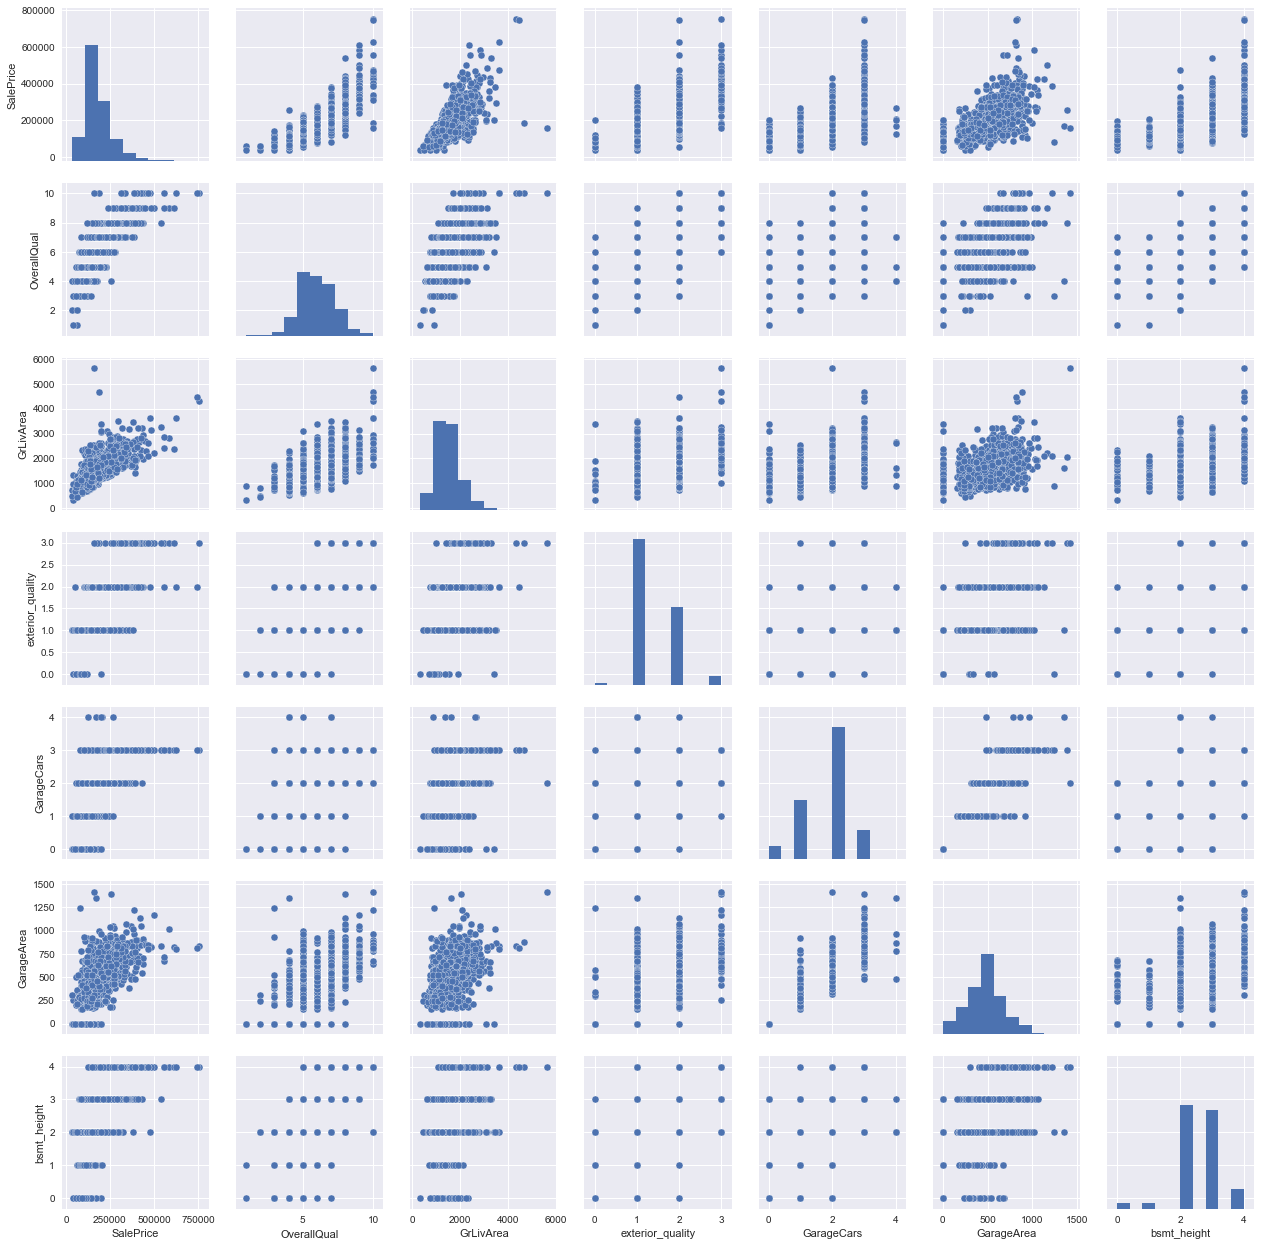

In [124]:
#scatterplot of important variables
sns.set()
cols = corrmat.nlargest(k-7, 'SalePrice')['SalePrice'].index
sns.pairplot(numeric_train[cols], size = 2.5)
plt.show();

Find skewness of variables, from: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [81]:
from scipy.stats import norm, skew #for some statistics

# Check the skew of all numerical features
skewed_feats = numeric_train.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
bsmt_finished2,3.368911


Tons of skewness... First, I think we need to deal with missingness before we act on skewness.
Too bad I don't know how.

In [125]:
train.fence.value_counts()

0.0    1179
0.5     168
1.5     113
Name: fence, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D986D72EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002D98937C160>]], dtype=object)

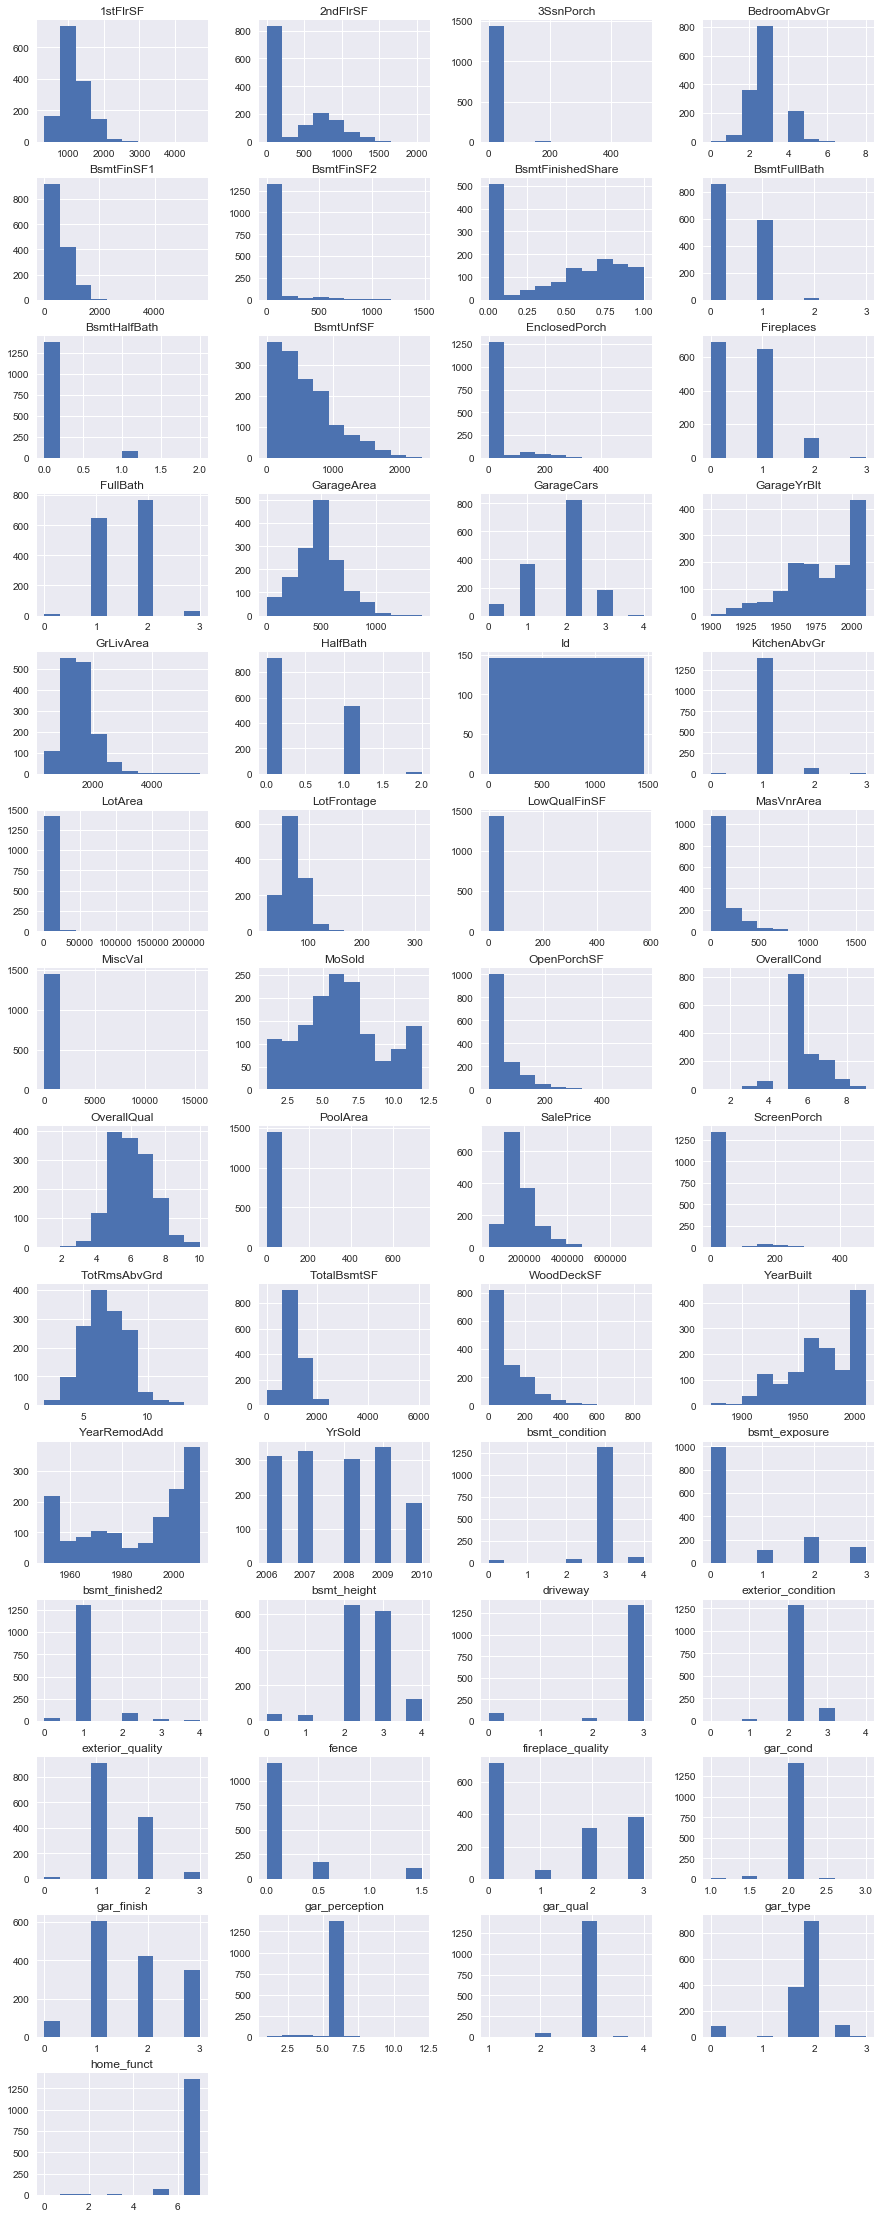

In [129]:
numeric_train.hist(figsize= (15,40), layout = (14,4))